# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import citipy

# Import API key
from confv2 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

print(api_key)

f5ad3ec9eed5d3650422e98f5f5835af


In [6]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

cities

637


['tilichiki',
 'cape town',
 'talnakh',
 'mercedes',
 'poum',
 'nalut',
 'ust-koksa',
 'ponta do sol',
 'mataura',
 'nikolskoye',
 'butaritari',
 'sola',
 'bredasdorp',
 'barrow',
 'calama',
 'idukki',
 'avarua',
 'kalasin',
 'illoqqortoormiut',
 'hermanus',
 'rikitea',
 'ushuaia',
 'busselton',
 'duluth',
 'chieti',
 'chartres',
 'aromashevo',
 'makokou',
 'canton',
 'urusha',
 'caravelas',
 'port elizabeth',
 'tombouctou',
 'qaanaaq',
 'boulder city',
 'east london',
 'hithadhoo',
 'havre-saint-pierre',
 'vikhorevka',
 'puerto cabezas',
 'korla',
 'saleaula',
 'hovd',
 'vuktyl',
 'chagda',
 'parczew',
 'georgetown',
 'makakilo city',
 'priargunsk',
 'cariamanga',
 'nouadhibou',
 'sioux lookout',
 'kruisfontein',
 'swiecie',
 'urumqi',
 'mackay',
 'boshnyakovo',
 'sitka',
 'toamasina',
 'kroya',
 'nargana',
 'punta arenas',
 'alta floresta',
 'anar darreh',
 'save',
 'bluff',
 'lata',
 'itarema',
 'flinders',
 'haines junction',
 'new norfolk',
 'puerto del rosario',
 'segou',
 'pisco

In [7]:
# an API call is made up of a couple of things
# 1.) base url -> location, everything after the base url -> 'order' configuration
# 2.) send the order
# 3.) do something with the returned object

# 1.) URL
# parts:            location        |      configuration...                  password                    specifics
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=seoul"
url

# 2.) send the order
seoul_data = requests.get(url)
seoul_json = seoul_data.json()
seoul_json

{'coord': {'lon': 126.98, 'lat': 37.57},
 'weather': [{'id': 520,
   'main': 'Rain',
   'description': 'light intensity shower rain',
   'icon': '09n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 76.21,
  'pressure': 998,
  'humidity': 94,
  'temp_min': 75.2,
  'temp_max': 77},
 'visibility': 4800,
 'wind': {'speed': 3.36, 'deg': 30},
 'rain': {'1h': 0.51},
 'clouds': {'all': 90},
 'dt': 1563644598,
 'sys': {'type': 1,
  'id': 8117,
  'message': 0.0074,
  'country': 'KR',
  'sunrise': 1563654382,
  'sunset': 1563706209},
 'timezone': 32400,
 'id': 1835848,
 'name': 'Seoul',
 'cod': 200}

In [8]:
# Data that we need:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# 3.) do something with the returned object
name = seoul_json['name']
max_temp = seoul_json['main']['temp_max']
humidity = seoul_json['main']['humidity']
cloudiness = seoul_json['clouds']['all']
wind_speed = seoul_json['wind']['speed']
latitude = seoul_json['coord']['lat']
longitude = seoul_json['coord']['lon']

seoul_dictionary = {
    'Name': name,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Latitude': latitude,
    'Longitude': longitude
}

seoul_dictionary

{'Name': 'Seoul',
 'Max Temp': 77,
 'Humidity': 94,
 'Cloudiness': 90,
 'Wind Speed': 3.36,
 'Latitude': 37.57,
 'Longitude': 126.98}

## Generate Cities List

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
# Get weather data for ALL cities, use for loop and store in list

city_dictionary_list = []

#url = 'https://openweathermap.org/api?'
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"

for x in range(len(cities)):
    # an API call is made up of a couple of things
    # 1.) base url -> location, everything after the base url -> 'order' configuration
    query_url = f"{url}appid={api_key}&units={units}&q={cities[x]}"
    
    # 2.) send the order, get back something
    response = requests.get(query_url)
    # response[404] means response does not exist. there are many cities 404 errors.
    # check response
    if response.status_code == 404:
        print('No city data for:', cities[x])
    else:
        # 3.) do something with the returned object
        city_json = response.json()
        
        name = city_json['name']
        max_temp = city_json['main']['temp_max']
        humidity = city_json['main']['humidity']
        cloudiness = city_json['clouds']['all']
        wind_speed = city_json['wind']['speed']
        latitude = city_json['coord']['lat']
        longitude = city_json['coord']['lon']

        city_dictionary = {
            'Name': name,
            'Max Temp': max_temp,
            'Humidity': humidity,
            'Cloudiness': cloudiness,
            'Wind Speed': wind_speed,
            'Latitude': latitude,
            'Longitude': longitude
        }

        # add dictionary to list
        city_dictionary_list.append(city_dictionary)
        print('City data found for:', cities[x])

City data found for: tilichiki
City data found for: cape town
City data found for: talnakh
City data found for: mercedes
City data found for: poum
City data found for: nalut
City data found for: ust-koksa
City data found for: ponta do sol
City data found for: mataura
City data found for: nikolskoye
City data found for: butaritari
City data found for: sola
City data found for: bredasdorp
City data found for: barrow
City data found for: calama
City data found for: idukki
City data found for: avarua
City data found for: kalasin
No city data for: illoqqortoormiut
City data found for: hermanus
City data found for: rikitea
City data found for: ushuaia
City data found for: busselton
City data found for: duluth
City data found for: chieti
City data found for: chartres
City data found for: aromashevo
City data found for: makokou
City data found for: canton
City data found for: urusha
City data found for: caravelas
City data found for: port elizabeth
City data found for: tombouctou
City data fou

City data found for: wexford
City data found for: kiunga
City data found for: honningsvag
City data found for: fairbanks
City data found for: manokwari
City data found for: port hardy
No city data for: mys shmidta
No city data for: barentsburg
City data found for: talisay
No city data for: tabukiniberu
City data found for: clyde river
City data found for: miri
No city data for: cagayan de tawi-tawi
City data found for: tyret pervaya
City data found for: takoradi
City data found for: kodiak
City data found for: nanortalik
City data found for: rio gallegos
City data found for: severo-kurilsk
City data found for: tamiahua
City data found for: grand gaube
City data found for: xinqing
City data found for: mayor pablo lagerenza
City data found for: oranjemund
City data found for: rucheng
City data found for: dutse
City data found for: te anau
City data found for: birjand
City data found for: dongsheng
No city data for: miranorte
City data found for: vila velha
City data found for: madingou
C

City data found for: ixtapa
City data found for: saint-joseph
City data found for: pochutla
City data found for: camacha
No city data for: ngukurr
City data found for: sebezh
City data found for: margate
City data found for: indramayu
City data found for: aksarka
City data found for: anadyr
City data found for: lysyanka
City data found for: saint anthony
City data found for: belyy yar
City data found for: pangody
City data found for: den helder
City data found for: lompoc
City data found for: trelleborg
City data found for: najran
City data found for: matara
City data found for: lubao
City data found for: alihe
City data found for: rocha
City data found for: huanren
City data found for: divnomorskoye
City data found for: jega
City data found for: abu dhabi
City data found for: touros
City data found for: varhaug
City data found for: tezu
City data found for: verkhnyaya khava
City data found for: bud
City data found for: muros
City data found for: guarapari
City data found for: dumai
No

In [10]:
city_dictionary_list

[{'Name': 'Tilichiki',
  'Max Temp': 10.21,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 1.52,
  'Latitude': 60.47,
  'Longitude': 166.1},
 {'Name': 'Cape Town',
  'Max Temp': 11.67,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 3.6,
  'Latitude': -33.93,
  'Longitude': 18.42},
 {'Name': 'Talnakh',
  'Max Temp': 16,
  'Humidity': 55,
  'Cloudiness': 0,
  'Wind Speed': 4,
  'Latitude': 69.49,
  'Longitude': 88.39},
 {'Name': 'Mercedes',
  'Max Temp': 22.22,
  'Humidity': 72,
  'Cloudiness': 85,
  'Wind Speed': 3.13,
  'Latitude': -33.25,
  'Longitude': -58.03},
 {'Name': 'Poum',
  'Max Temp': 21,
  'Humidity': 73,
  'Cloudiness': 40,
  'Wind Speed': 1,
  'Latitude': 41.28,
  'Longitude': 20.71},
 {'Name': 'Nalut',
  'Max Temp': 30.81,
  'Humidity': 24,
  'Cloudiness': 0,
  'Wind Speed': 8.47,
  'Latitude': 31.86,
  'Longitude': 10.98},
 {'Name': 'Ust-Koksa',
  'Max Temp': 6.41,
  'Humidity': 96,
  'Cloudiness': 0,
  'Wind Speed': 1.36,
  'Latitude': 50.27,
  'Longitude

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_df = pd.DataFrame(city_dictionary_list)
city_df.head()


,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Name,Wind Speed
0,100,98,60.47,166.10,10.21,Tilichiki,1.52
1,20,70,-33.93,18.42,11.67,Cape Town,3.60
2,0,55,69.49,88.39,16.00,Talnakh,4.00
3,85,72,-33.25,-58.03,22.22,Mercedes,3.13
4,40,73,41.28,20.71,21.00,Poum,1.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

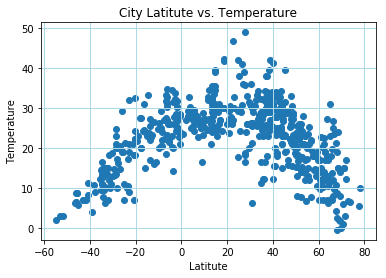

In [43]:
# Grab column data for each
latitude = city_df['Latitude']
temperature = city_df['Max Temp']

# Chart title
plt.title("City Latitute vs. Temperature")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Temperature")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, temperature)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&Temp.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Humidity Plot

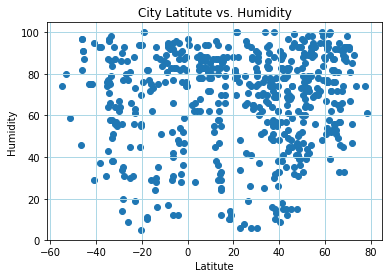

In [44]:
# Grab column data for each
latitude = city_df['Latitude']
humidity = city_df['Humidity']

# Chart title
plt.title("City Latitute vs. Humidity")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Humidity")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, humidity)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&Humidity.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Cloudiness Plot

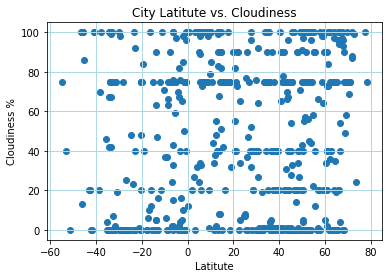

In [45]:
# Grab column data for each
latitude = city_df['Latitude']
cloudiness = city_df['Cloudiness']

# Chart title
plt.title("City Latitute vs. Cloudiness")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Cloudiness %")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, cloudiness)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&Cloudiness.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

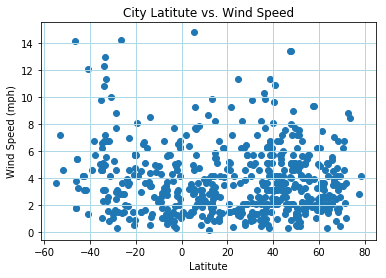

In [46]:
# Grab column data for each
latitude = city_df['Latitude']
wind_speed = city_df['Wind Speed']

# Chart title
plt.title("City Latitute vs. Wind Speed")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Wind Speed (mph)")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, wind_speed)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&WindSpeed.png", bbox_inches="tight")
plt.show()